# Lab Segmentation 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from matplotlib.pyplot import bar
import skimage.io as io
from skimage.exposure import histogram
%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Show the figures / plots inside the notebook


def show_images(images, titles=None):
    # This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None:
        titles = ['(%d)' % i for i in range(1, n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image, title in zip(images, titles):
        a = fig.add_subplot(1, n_ims, n)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


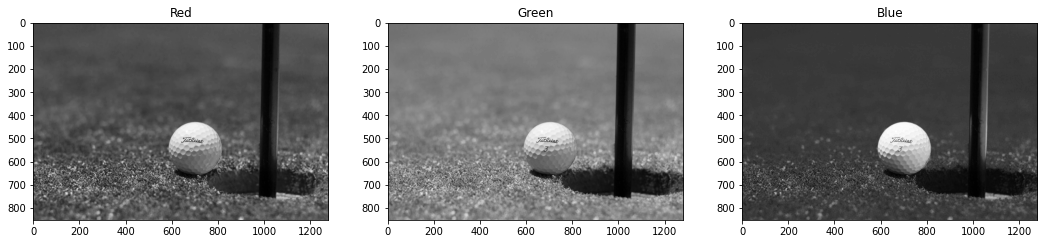

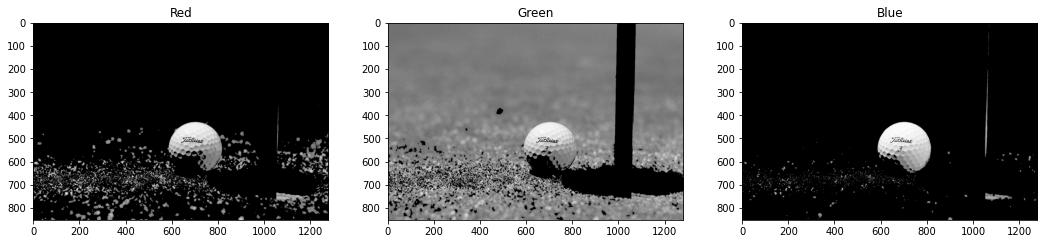

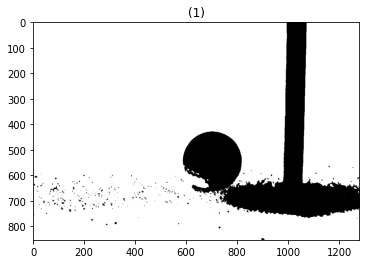

In [2]:
# For all requirements: The quality of the results is evaluated.

# 1- Read the image
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)
# read image golf
image = io.imread("./imgs/exp1/golf.jpeg")
image = image.astype(float)

# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)
R = image[:, :, 0]
G = image[:, :, 1]
B = image[:, :, 2]

# G is the brightest i.e. has highest values

# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)
show_images([R, G, B], ["Red", "Green", "Blue"])

# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)
t = 110
G_thresholded = np.where(G < t, 0, G)
R_thresholded = np.where(R < t, 0, R)
B_thresholded = np.where(B < t, 0, B)
show_images([R_thresholded, G_thresholded, B_thresholded],
            ["Red", "Green", "Blue"])

# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels
# have larger values than the other channels with an appropriate threshold
new_img = np.zeros(G.shape)
thresh = 10
for x in range(image.shape[0]):
    for y in range(image.shape[1]):
        if image[x][y][1] - image[x][y][0] > thresh and image[x][y][1] - image[x][y][2] > thresh:
            new_img[x][y] = 1
# 6- display the binarized image
show_images([new_img])


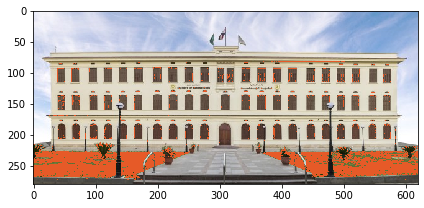

In [3]:
# 1- Get the required RGB color (Using a color picker)
# 465923 = rgb(70, 89, 35)
# 2- Read image
image = io.imread("./imgs/exp2/cufe.png")/255
# 3- extract R, G and B channels (as float)
R = image[:, :, 0].astype(float)
G = image[:, :, 1].astype(float)
B = image[:, :, 2].astype(float)
# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)
R_diff = R - 70/255
G_diff = G - 90/255
B_diff = B - 30/255
# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)
difference = np.sqrt(R_diff**2 + G_diff**2 + B_diff**2)
# 6-  create a mask by thresholding the differences
new_img = np.copy(image)
for x in range(image.shape[0]):
    for y in range(image.shape[1]):
        if difference[x][y] < 0.14:
            new_img[x][y][0] = 230/255
            new_img[x][y][1] = 90/255
            new_img[x][y][2] = 40/255
        else:
            new_img[x][y] = image[x][y]
# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40

# 8- show the image or save it
io.imshow(new_img)
